# Support Vector Machine (SVM) - Multiclass Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

### 1. Data Processing:

a) Import the data: You are provided separate .csv files for train and test.

Train shape: (507, 148)
Test shape: (168, 148)

In [4]:
print("a) Importing data...")
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

print(f"Train shape: {train_data.shape}") 
print(f"Test shape: {test_data.shape}") 

a) Importing data...
Train shape: (507, 148)
Test shape: (168, 148)


b) Remove any rows that have missing data across both sets of data.

In [5]:
train_data_clean = train_data.dropna()
test_data_clean = test_data.dropna()

print(f"Train shape after removing missing data: {train_data_clean.shape}")
print(f"Test shape after removing missing data: {test_data_clean.shape}")

Train shape after removing missing data: (507, 148)
Test shape after removing missing data: (168, 148)


c) The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test".

In [6]:
y_train = train_data_clean['class']
X_train = train_data_clean.drop('class', axis=1)

y_test = test_data_clean['class']
X_test = test_data_clean.drop('class', axis=1)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (507, 147)
y_train shape: (507,)
X_test shape: (168, 147)
y_test shape: (168,)


In [7]:
print("\nClass distribution in training data:")
print(y_train.value_counts())
print("\nClass distribution in test data:")
print(y_test.value_counts())


Class distribution in training data:
class
building     97
concrete     93
tree         89
grass        83
shadow       45
asphalt      45
car          21
soil         20
pool         14
Name: count, dtype: int64

Class distribution in test data:
class
grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
asphalt      14
soil         14
Name: count, dtype: int64


d) Scale all features / predictors (NOT THE TARGET VARIABLE)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#Print scaled features statistics
print("\nScaled features statistics:")
print(pd.DataFrame(X_train_scaled).describe())


Scaled features statistics:
                0             1             2             3             4    \
count  5.070000e+02  5.070000e+02  5.070000e+02  5.070000e+02  5.070000e+02   
mean   3.854029e-16  9.109522e-17 -3.118260e-16 -3.556217e-16  2.802930e-16   
std    1.000988e+00  1.000988e+00  1.000988e+00  1.000988e+00  1.000988e+00   
min   -1.658016e+00 -7.744002e-01 -2.204310e+00 -2.196714e+00 -1.359473e+00   
25%   -7.204800e-01 -5.781155e-01 -7.081406e-01 -6.035918e-01 -6.150777e-01   
50%   -1.223968e-01 -3.431470e-01 -4.911349e-02  7.974018e-02 -2.142494e-01   
75%    5.726729e-01  1.704884e-01  5.831963e-01  9.373681e-01  3.469102e-01   
max    4.048021e+00  7.456661e+00  4.065353e+00  1.270525e+00  6.737258e+00   

                5             6             7             8             9    \
count  5.070000e+02  5.070000e+02  5.070000e+02  5.070000e+02  5.070000e+02   
mean  -5.605860e-17  2.680302e-16 -2.557674e-16  8.671564e-17 -2.102197e-16   
std    1.000988e+00  1

### 2. Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters - this will let us compare SVMs to Random Forest in multiclass problems.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [13]:
print("a) Creating and fitting Random Forest model...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

a) Creating and fitting Random Forest model...


RandomForestClassifier(random_state=42)

b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [15]:
rf_test_pred = rf_model.predict(X_test_scaled)

c) Calculate the confusion matrix and classification report for the test data. 


Confusion Matrix (Test Data):


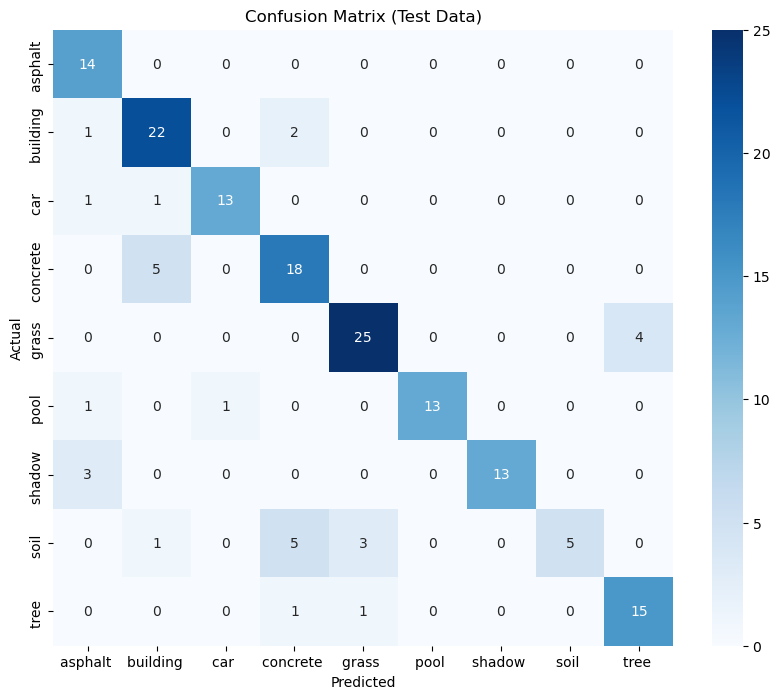


Classification Report (Test Data):
              precision    recall  f1-score   support

    asphalt        0.70      1.00      0.82        14
   building        0.76      0.88      0.81        25
        car        0.93      0.87      0.90        15
   concrete        0.69      0.78      0.73        23
      grass        0.86      0.86      0.86        29
       pool        1.00      0.87      0.93        15
     shadow        1.00      0.81      0.90        16
       soil        1.00      0.36      0.53        14
       tree        0.79      0.88      0.83        17

    accuracy                           0.82       168
   macro avg       0.86      0.81      0.81       168
weighted avg       0.85      0.82      0.82       168



In [18]:
print("\nConfusion Matrix (Test Data):")
cm_test = confusion_matrix(y_test, rf_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

print("\nClassification Report (Test Data):")
cr_test = classification_report(y_test, rf_test_pred)
print(cr_test)

d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?


Confusion Matrix (Training Data):


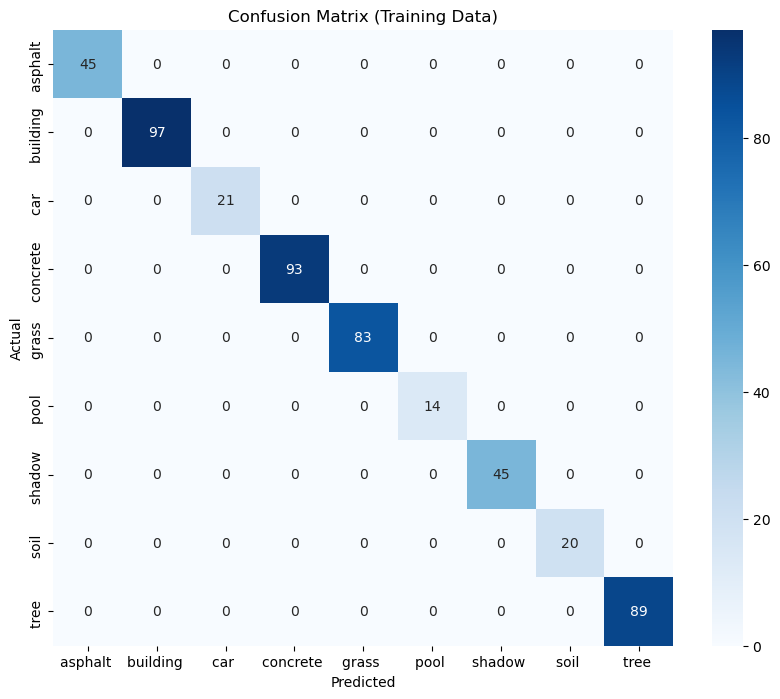


Classification Report (Training Data):
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        1.00      1.00      1.00        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      1.00      1.00        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      1.00      1.00        89

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507


Assessing overfitting in Random Forest model:
Training accuracy: 1.0000
Testing accuracy: 0.8214


In [19]:
rf_train_pred = rf_model.predict(X_train_scaled)

print("\nConfusion Matrix (Training Data):")
cm_train = confusion_matrix(y_train, rf_train_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_train.unique()), yticklabels=sorted(y_train.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training Data)')
plt.show()

print("\nClassification Report (Training Data):")
cr_train = classification_report(y_train, rf_train_pred)
print(cr_train)

# Overfitting analysis
print("\nAssessing overfitting in Random Forest model:")
print(f"Training accuracy: {rf_model.score(X_train_scaled, y_train):.4f}")
print(f"Testing accuracy: {rf_model.score(X_test_scaled, y_test):.4f}")


e) Identify the top 5 features. Feel free to print a list OR to make a plot. 


Top 5 Features:
           Feature  Importance
103  BordLngth_100    0.007738
61    BordLngth_60    0.005952
40    BordLngth_40    0.005952
22         Area_40    0.005952
85        Area_100    0.005357


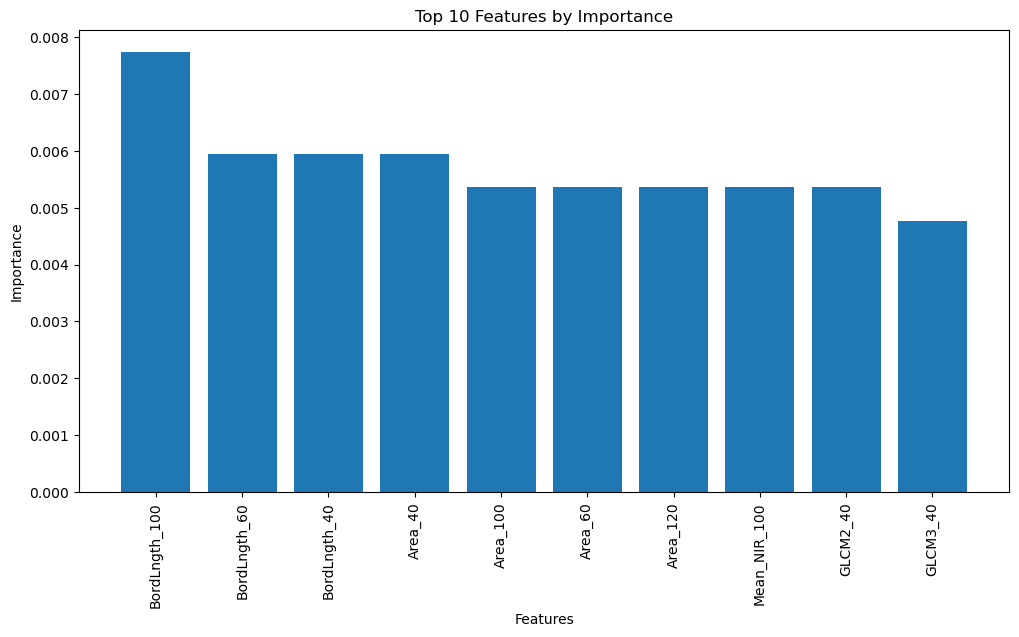

In [20]:
# Permutation importance for feature importance
result = permutation_importance(rf_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Feature names
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Sorting by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Top 5 features
print("\nTop 5 Features:")
print(feature_importance_df.head(5))

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10))
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Features by Importance')
plt.show()

### 3. LinearSVM Classifier - Base Model:

Create a simple LinearSVC Classifier only using default parameters.

a) Use the LinearSVC in sklearn. Fit your model on the training data.

In [26]:
linear_svc_model = LinearSVC(random_state=42)
linear_svc_model.fit(X_train_scaled, y_train)

LinearSVC(random_state=42)

b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [27]:
linear_svc_test_pred = linear_svc_model.predict(X_test_scaled)

c) Calculate the confusion matrix and classification report for test data.


Confusion Matrix (Test Data):


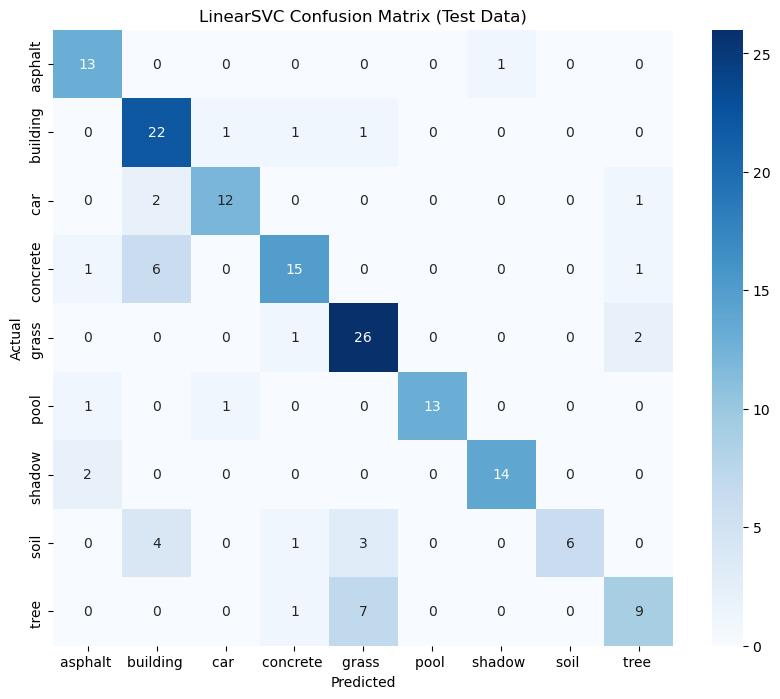


Classification Report (Test Data):
              precision    recall  f1-score   support

    asphalt        0.76      0.93      0.84        14
   building        0.65      0.88      0.75        25
        car        0.86      0.80      0.83        15
   concrete        0.79      0.65      0.71        23
      grass        0.70      0.90      0.79        29
       pool        1.00      0.87      0.93        15
     shadow        0.93      0.88      0.90        16
       soil        1.00      0.43      0.60        14
       tree        0.69      0.53      0.60        17

    accuracy                           0.77       168
   macro avg       0.82      0.76      0.77       168
weighted avg       0.80      0.77      0.77       168



In [29]:
print("\nConfusion Matrix (Test Data):")
linear_svc_cm_test = confusion_matrix(y_test, linear_svc_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(linear_svc_cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LinearSVC Confusion Matrix (Test Data)')
plt.show()

print("\nClassification Report (Test Data):")
linear_svc_cr_test = classification_report(y_test, linear_svc_test_pred)
print(linear_svc_cr_test)



d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?


Confusion Matrix (Training Data):


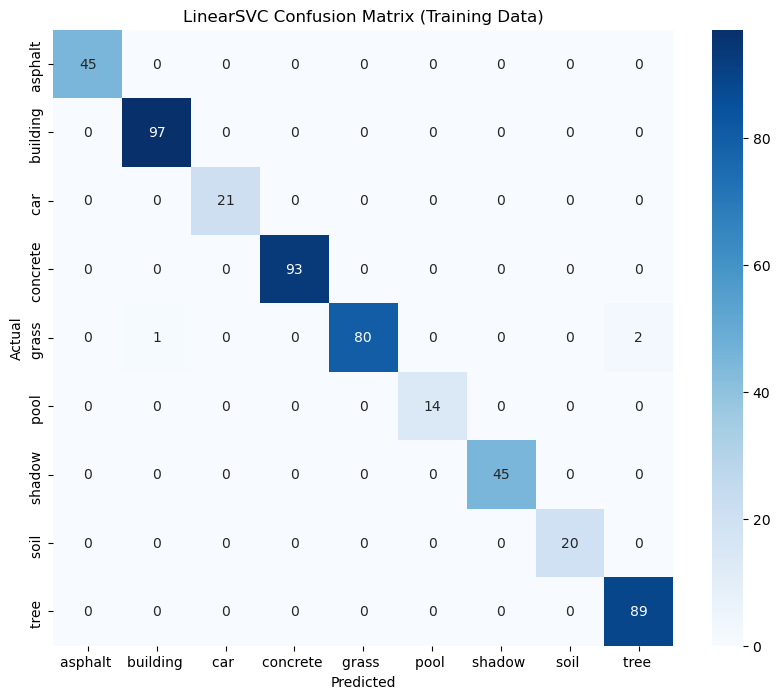


Classification Report (Training Data):
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.99      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      0.96      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        0.98      1.00      0.99        89

    accuracy                           0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.99      0.99      0.99       507


Assessing overfitting in LinearSVC model:
Training accuracy: 0.9941
Testing accuracy: 0.7738


In [30]:
linear_svc_train_pred = linear_svc_model.predict(X_train_scaled)

print("\nConfusion Matrix (Training Data):")
linear_svc_cm_train = confusion_matrix(y_train, linear_svc_train_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(linear_svc_cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_train.unique()), yticklabels=sorted(y_train.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LinearSVC Confusion Matrix (Training Data)')
plt.show()

print("\nClassification Report (Training Data):")
linear_svc_cr_train = classification_report(y_train, linear_svc_train_pred)
print(linear_svc_cr_train)

# Check for overfitting
print("\nAssessing overfitting in LinearSVC model:")
print(f"Training accuracy: {linear_svc_model.score(X_train_scaled, y_train):.4f}")
print(f"Testing accuracy: {linear_svc_model.score(X_test_scaled, y_test):.4f}")

### 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with linear kernel.

a) Use SVC from sklearn with kernel = "linear". Run the GridSearchCV using the following (SVMs run much faster than RandomForest):

C: 0.01 - 10 in increments of 0.2 (consider using the np.arange() method from numpy to build out a sequence of values)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing (sorry to our grader for not specifying this last week!).

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Parameter grid
C_values = np.arange(0.01, 10.01, 0.2)  # C from 0.01 to 10 in increments of 0.2
param_grid = {'C': C_values}

# SVC model with linear kernel
svc_linear = SVC(kernel='linear', random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=svc_linear,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    verbose=0,  # Reduce printing
    n_jobs=-1  # Use all available cores
)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81])})

b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [33]:
print(f"Best parameters: {grid_search.best_params_}")
best_svc_model = grid_search.best_estimator_
print(f"Best model: {best_svc_model}")

Best parameters: {'C': 0.01}
Best model: SVC(C=0.01, kernel='linear', random_state=42)


c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

d) Calculate the confusion matrix and classification report for test data.

e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

### 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a polynomial kernel.

a) Use SVC from sklearn with kernel = "poly". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2
degree: 2, 3, 4, 5, 6

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

d) Calculate the confusion matrix and classification report for test data.

e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

### 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a RBF kernel.

a) Use SVC from sklearn with kernel = "rbf". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2
gamma: 0.01,  0.1, 1, 10, 100

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

d) Calculate the confusion matrix and classification report for test data.

e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

### 7. Conceptual Questions:

a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data.

b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel? 

c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model? 

d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.

e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.